In [ ]:
# You can safely ignore any warnings on importing this
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Simple y=mx+b+noise **data**

In [ ]:
m = 2
b = 3
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101) 
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [ ]:
y = 2*x + b + noise

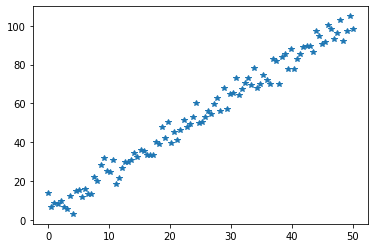

In [ ]:
plt.plot(x,y,'*')

In [ ]:
#Creating a Neural Network for a Line of Best Fit
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train on Data
#** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 3ms/step - loss: 3296.3802
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 3380.8741
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 3383.8750
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 3294.2810
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 3544.0411
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 3448.2162
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 3229.4270
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 3401.5532
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 3340.6468
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 3093.1136
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 3170.5118
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 3314.6856
Epoch 13/500
4/4 [=======

Predicting on new x points
Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [ ]:
x_for_predictions = np.linspace(0,50,1000)

In [ ]:
y_predicted = model.predict(x_for_predictions)

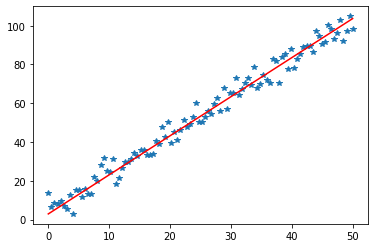

In [ ]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r') #r is red line

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [ ]:
mean_squared_error(y,prediction_for_true_y)

17.544905708065997

In [ ]:
#RNN
#they are specifically designed to work with sequence data like
#time series data, sentences(sequence of words), audio(sequence of sound),
#car trajectories(sequence of instruction(left,right))
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [ ]:
df.columns = ['Sales']

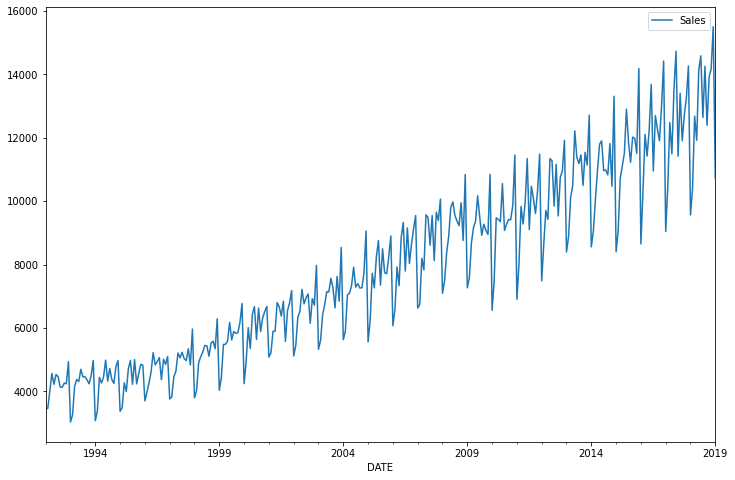

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


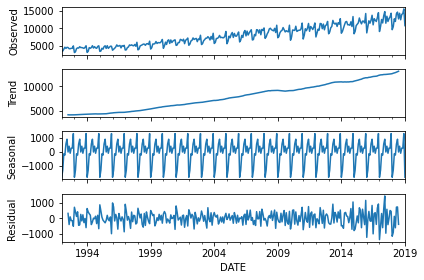

In [ ]:
results = seasonal_decompose(df['Sales'])
results.plot();

In [ ]:
len(df)

325

In [ ]:
#test data is of 12 months
train = df.iloc[:313]
test = df.iloc[313:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)# .fit will find max value in training data set

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train = scaler.transform(train) #.tranform will divide every data by max value in
                                       # training dataset
scaled_test = scaler.transform(test)  

Time Series Generator

This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, length of history, etc., to produce batches for training/validation.

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
len(scaled_train)

313

In [ ]:
len(generator) # n_input = 2

311

In [ ]:
# What does the first batch look like?
X,y = generator[0]

In [ ]:
X

array([[[0.03658432],
        [0.03649885]]])

In [ ]:
y

array([[0.08299855]])

In [ ]:
#CREATE THE MODEL
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
n_input = 12
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit_generator(generator,epochs=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
311/311 [==============================] - 3s 4ms/step - loss: 0.0711
Epoch 2/50
311/311 [==============================] - 1s 4ms/step - loss: 0.0112
Epoch 3/50
311/311 [==============================] - 1s 4ms/step - loss: 0.0111
Epoch 4/50
311/311 [==============================] - 1s 4ms/step - loss: 0.0125
Epoch 5/50
311/311 [==============================] - 1s 4ms/step - loss: 0.0117
Epoch 6/50
311/311 [==============================] - 1s 4ms/step - loss: 0.0099
Epoch 7/50
311/311 [==============================] - 1s 3ms/step - loss: 0.0130
Epoch 8/50
311/311 [==============================] - 1s 3ms/step - loss: 0.0095
Epoch 9/50
311/311 [==============================] - 1s 3ms/step - loss: 0.0110
Epoch 10/50
311/311 [==============================] - 1s 3ms/step - loss: 0.0094
Epoch 11/50
311/311 [==============================] - 1s 3ms/step - loss: 0.0098
Epoch 12/50
311/311 [==============================] - 1s 3ms/step - loss: 0.0103
Epoch 13/50
311/311 [====

In [ ]:
#Evaluate on Test Data
first_eval_batch = scaled_train[-12:]

In [ ]:
n_input=12
n_features=1

In [ ]:
first_eval_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features)) #check shape of X
first_eval_batch 

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [ ]:
model.predict(first_eval_batch)

array([[12.4296665]], dtype=float32)

FORECAST USING RNN MODEL

In [ ]:
#Now let's put this logic in a for loop to predict into the future for the entire test range.
test_predictions = []  #HOLDING MY PREDICTIONS

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
current_batch.shape

(1, 12, 1)

In [ ]:
#NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS.
# ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([12.4296665], dtype=float32),
 array([26.730886], dtype=float32),
 array([55.4229], dtype=float32),
 array([121.59416], dtype=float32),
 array([292.2315], dtype=float32),
 array([752.1795], dtype=float32),
 array([1996.4061], dtype=float32),
 array([5439.9463], dtype=float32),
 array([14111.656], dtype=float32),
 array([36871.31], dtype=float32),
 array([83782.31], dtype=float32),
 array([215956.84], dtype=float32)]

In [ ]:
#earlier we applied minmaxscaler,now we have to chamge our test_predictions to normal form
#Inverse Transformations and Compare
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions 

array([[1.48445669e+05],
       [3.15755641e+05],
       [6.51423521e+05],
       [1.42556110e+06],
       [3.42184739e+06],
       [8.80277902e+06],
       [2.33589863e+07],
       [6.36449626e+07],
       [1.65095297e+08],
       [4.31360470e+08],
       [9.80172305e+08],
       [2.52648215e+09]])

In [ ]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,1.484457e+05
2018-03-01,12683,3.157556e+05
2018-04-01,11919,6.514235e+05
2018-05-01,14138,1.425561e+06
2018-06-01,14583,3.421847e+06
2018-07-01,12640,8.802779e+06
2018-08-01,14257,2.335899e+07
2018-09-01,12396,6.364496e+07
2018-10-01,13914,1.650953e+08


In [ ]:

test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,1.484457e+05
2018-03-01,12683,3.157556e+05
2018-04-01,11919,6.514235e+05
2018-05-01,14138,1.425561e+06
2018-06-01,14583,3.421847e+06
2018-07-01,12640,8.802779e+06
2018-08-01,14257,2.335899e+07
2018-09-01,12396,6.364496e+07
2018-10-01,13914,1.650953e+08


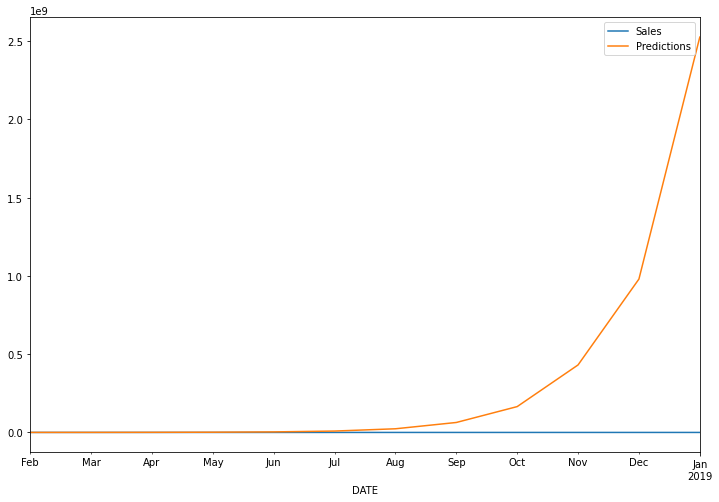

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
#TO SAVE THE MODEL
model.save('my_rnn_model.h5')

In [ ]:
#LOAD MODEL
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

OSError: ignored

In [ ]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('BeerWineLiquor.csv')
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [ ]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting

Step 1: Create "future" placeholder dataframe

NOTE:   Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info:

In [ ]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [ ]:
future.head()  

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [ ]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [ ]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [ ]:
len(df)

324

In [ ]:
len(future)

348

Step 2: Predict and fill in the Future

In [ ]:
forecast = m.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1139.310342,1474.694300,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1184.584099,1508.192475,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1439.697066,1773.134782,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1431.015381,1737.898364,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1680.468690,1985.030102,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4628.559148,4467.751455,4789.115565
337,2020-02-01,4679.231311,4521.255695,4831.230670
338,2020-03-01,4942.493052,4786.420806,5104.969003
339,2020-04-01,4941.412350,4777.129799,5107.708446
340,2020-05-01,5198.212046,5033.140428,5354.064055
341,2020-06-01,5178.840512,5012.040998,5345.344655
342,2020-07-01,5311.075537,5137.335866,5465.608067
343,2020-08-01,5240.612763,5076.005817,5387.420220
344,2020-09-01,5083.379410,4928.300489,5248.303262
345,2020-10-01,5188.922115,5018.620154,5352.528293


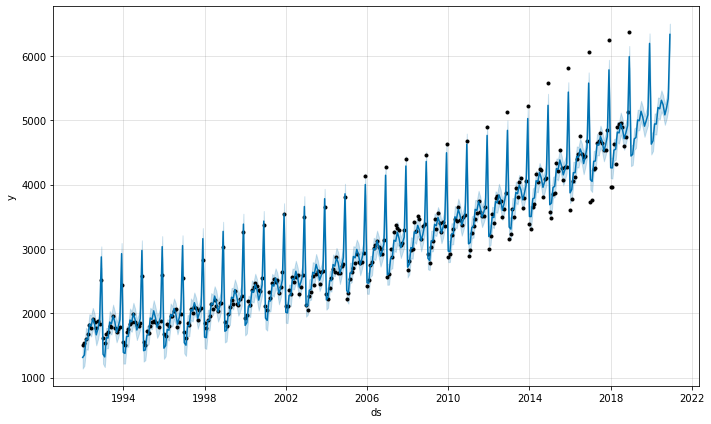

In [ ]:
#Plotting Forecast
#We can use Prophet's own built in plotting tools
m.plot(forecast);

ConversionError: ignored

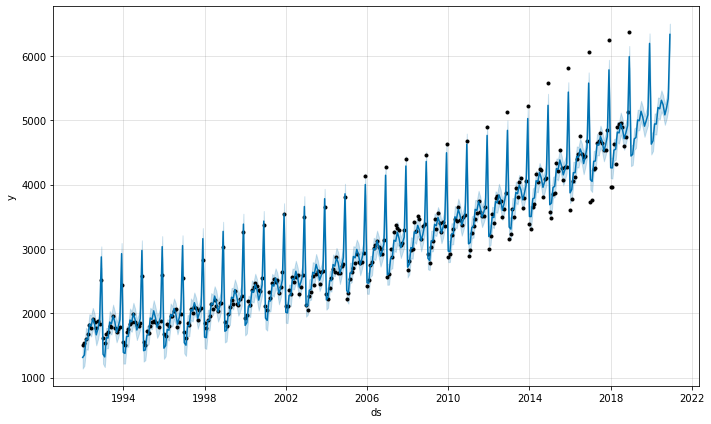

In [ ]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2021-01-01')

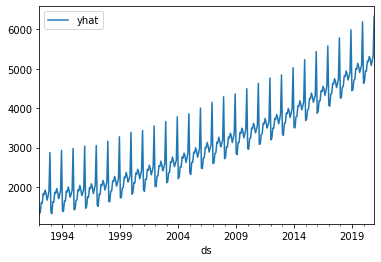

In [ ]:
forecast.plot(x='ds',y='yhat')

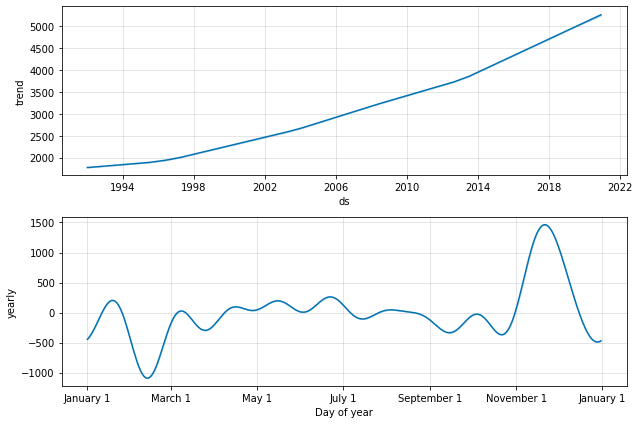

In [ ]:
m.plot_components(forecast);


Forecast Evaluations

Classic Train/Test Split

In [ ]:
df = pd.read_csv('Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [ ]:
df.columns = ['ds','y']

In [ ]:
# YOU CAN SAFELY IGNORE THIS COPY WARNING
# CHECK THE DOCS LINK FOR MORE INFO ON THIS COPY WARNING
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


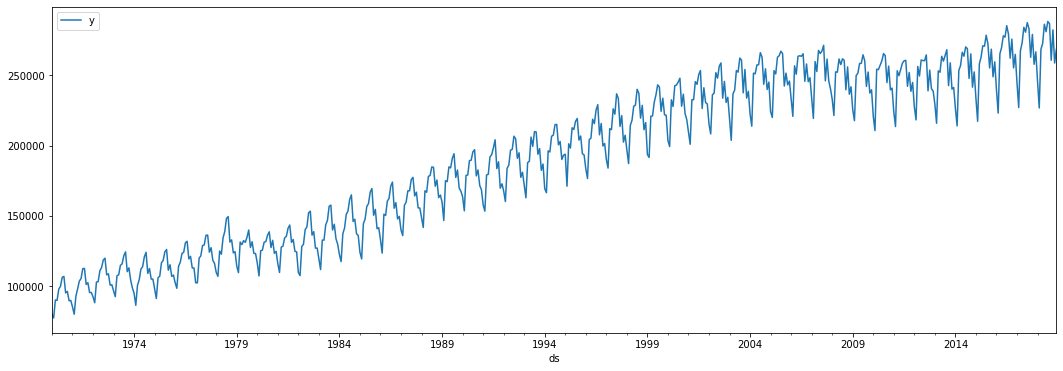

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(df)

588

In [ ]:
train = df.iloc[:576]
test = df.iloc[576:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263457.725002,273576.125411,285633.388732,263404.171424,263498.817135,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,0.0,0.0,0.0,279901.369516
584,2018-09-01,263600.413936,256186.786251,267755.061702,263519.665406,263680.467608,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,0.0,0.0,0.0,261926.128674
585,2018-10-01,263738.500000,263274.649115,275056.664558,263638.510385,263836.882706,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,0.0,0.0,0.0,269039.499421
586,2018-11-01,263881.188934,250012.680412,261695.424442,263755.372582,264022.426329,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,0.0,0.0,0.0,255666.543633
587,2018-12-01,264019.274999,251536.073438,263057.287636,263849.933711,264192.932967,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,0.0,0.0,0.0,257094.193073


In [ ]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


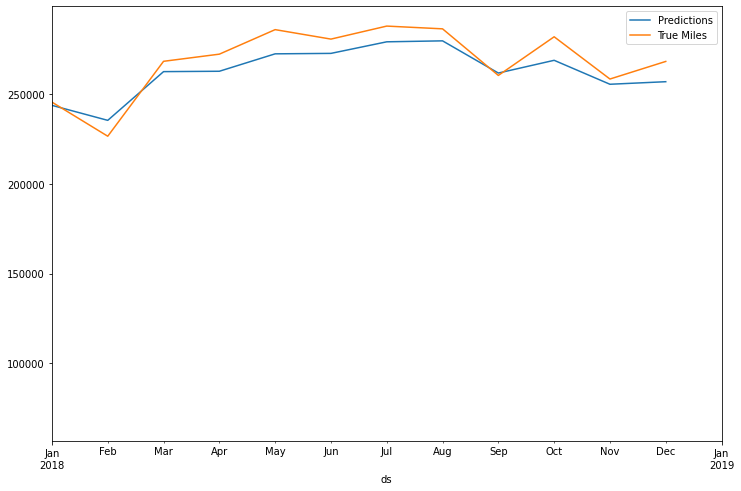

In [ ]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [ ]:
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
predictions = forecast.iloc[-12:]['yhat']
predictions

576    243890.540695
577    235518.185920
578    262721.044615
579    262926.543476
580    272653.963220
581    272904.801470
582    279365.372083
583    279901.369516
584    261926.128674
585    269039.499421
586    255666.543633
587    257094.193073
Name: yhat, dtype: float64

In [ ]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [ ]:
rmse(predictions,test['y'])

8588.50451989775

In [ ]:
test.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    268739.666667
dtype: float64

Prophet Diagnostics

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [ ]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [ ]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087478,107073.197151,109874.484454,102445.0,1976-12-11
1,1977-02-01,102996.111557,101644.430837,104415.026226,102416.0,1976-12-11
2,1977-03-01,118973.318267,117443.974704,120476.612763,119960.0,1976-12-11
3,1977-04-01,120612.923861,119138.742980,122005.788993,121513.0,1976-12-11
4,1977-05-01,127883.031986,126477.368556,129241.331966,128884.0,1976-12-11


In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
103,2017-08-01,273412.916090,267076.726423,279547.746508,283184.0,2016-12-01
104,2017-09-01,255533.787611,250224.016724,261323.480289,262673.0,2016-12-01
105,2017-10-01,262639.269752,256817.013334,268747.668924,278937.0,2016-12-01
106,2017-11-01,249291.849819,243332.214120,255038.898387,257712.0,2016-12-01
107,2017-12-01,250540.244359,244986.572975,256404.804637,266535.0,2016-12-01


In [ ]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.430030e+07,4929.533140,4534.578066,0.027790,0.023419,0.3
1,53 days,2.180221e+07,4669.283718,4269.242480,0.025045,0.023419,0.3
2,54 days,1.835927e+07,4284.771500,3749.319270,0.020183,0.022331,0.4
3,55 days,2.318231e+07,4814.801050,4262.593972,0.023194,0.023419,0.3
4,57 days,2.101189e+07,4583.872792,4000.766561,0.021482,0.022331,0.4
...,...,...,...,...,...,...,...
94,360 days,1.833685e+07,4282.155252,3750.317263,0.019550,0.019595,0.5
95,361 days,1.744517e+07,4176.741529,3472.704963,0.018164,0.018940,0.5
96,362 days,3.175299e+07,5634.978870,4397.649029,0.021959,0.024754,0.4
97,364 days,3.001684e+07,5478.762932,4235.776363,0.021356,0.021737,0.5


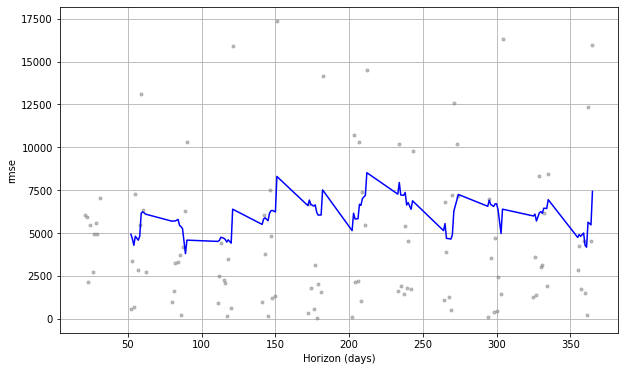

In [ ]:
plot_cross_validation_metric(df_cv, metric='rmse');

Trend Changes In Prophet

In [ ]:
df = pd.read_csv('HospitalityEmployees.csv')

In [ ]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

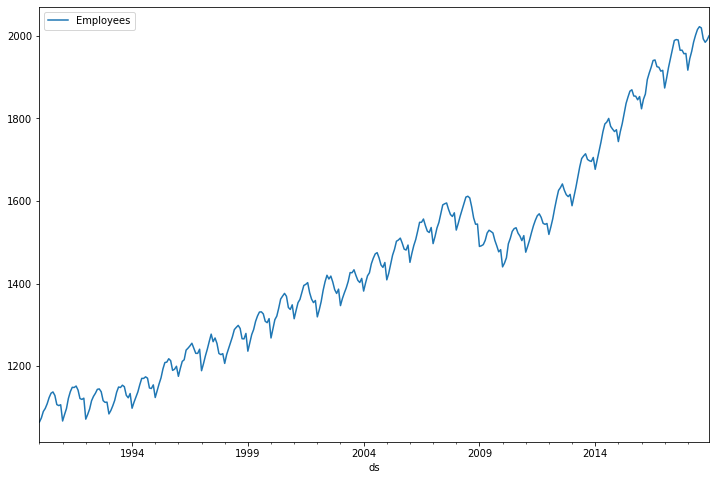

In [ ]:
df.plot(x='ds',y='y',figsize=(12,8),label='Employees')

In [ ]:
len(df)

348

In [ ]:
train = df.iloc[:336]
test = df.iloc[336:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


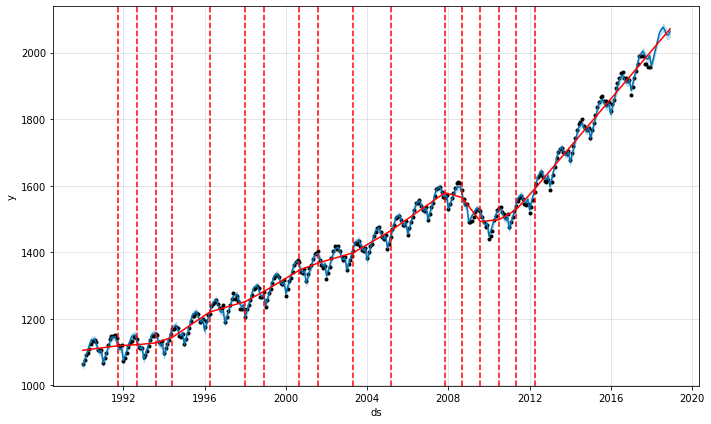

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Changing Seasonality

In [ ]:
df = pd.read_csv('airline_passengers.csv')

In [ ]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


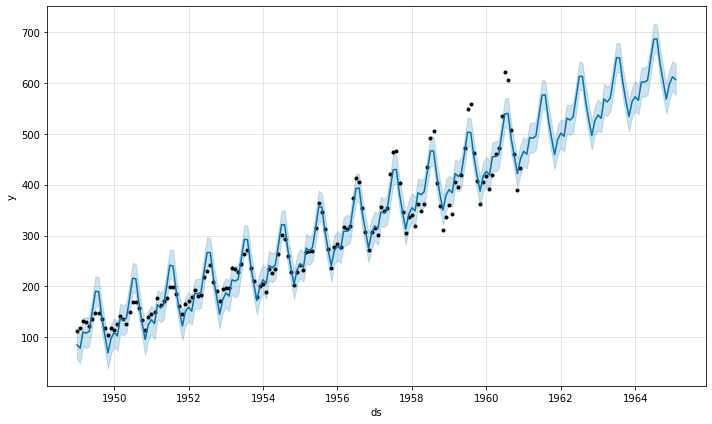

In [ ]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

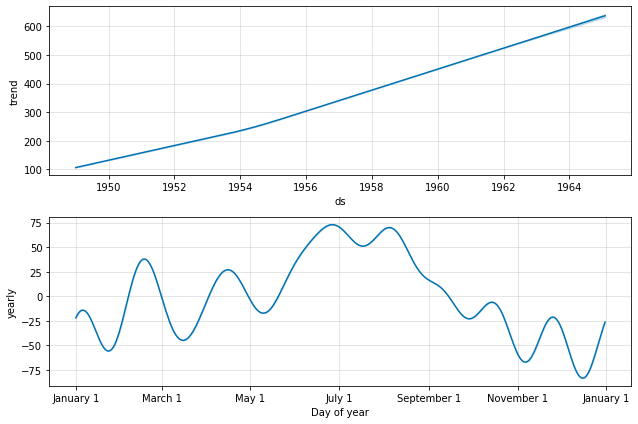

In [ ]:
fig = m.plot_components(forecast)

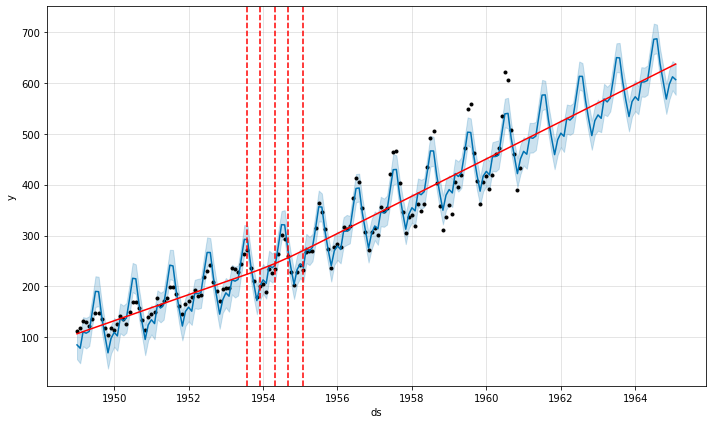

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Change to Multiplicative

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


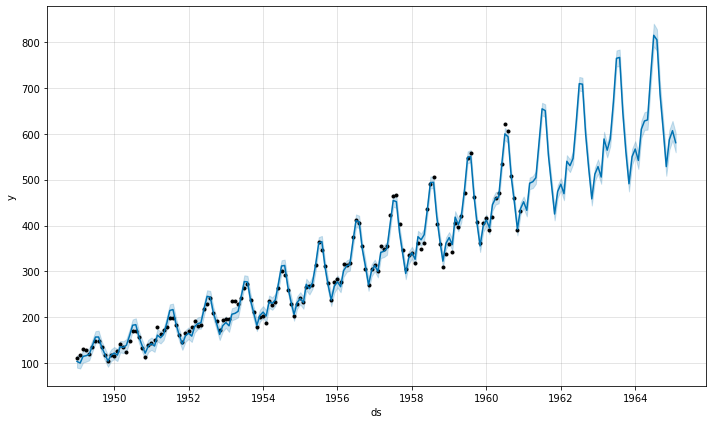

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

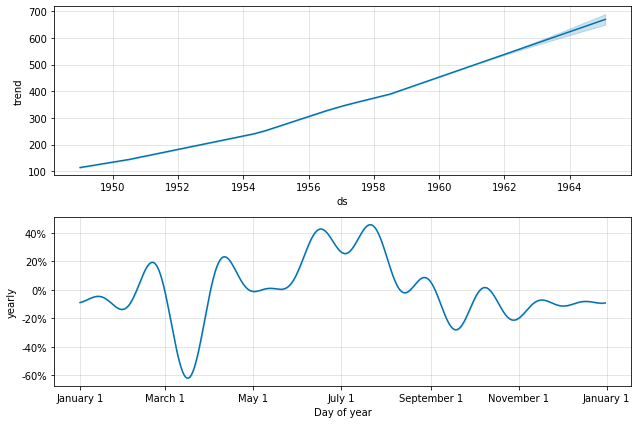

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
!pip install netcdf4

     |████████████████████████████████| 4.7MB 5.4MB/s 
     |████████████████████████████████| 317kB 42.0MB/s 


In [ ]:
import netCDF4 as nc